# Supervised Machine Learning for Breast Cancer Prediction

This notebook demonstrates a streamlined classical machine learning (ML) approach for breast cancer diagnosis. We will build a selection of models, using multiple algorithms and techniques, and compare their performance.

## Key Objectives
- Apply **multiple classical ML algorithms**
- Perform **feature selection** and **preprocessing**
- Use **cross-validation** and **hyperparameter tuning**
- Compare model **performance** and **interpretability**

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn essentials
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

# Classical ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')

In [4]:
# Load in the data

## 1. Data Preprocessing & Splitting

In [5]:
# Check for correlations

In [6]:
# Split the data:
X_train, X_test, y_train, y_test = 

# Feature scaling:


# Feature selection - top 15 features:


# Get selected feature names:
selected_features = X.columns[selector.get_support()].tolist()
print(f"Selected features ({len(selected_features)}):")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

SyntaxError: invalid syntax (2441686844.py, line 2)

## 2. Model Training & Evaluation

![Cross validation cross validation](../assets/grid_search_cross_validation.png)

In [ ]:
# Define models in a dictionary:

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Iterate through, train and evaluate each model:
results = {}

for name, model in models.items():
    # Train model
    
    # Make predictions

    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Cross-validation score

    # Add scores to dataframe    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Score': cv_score
    }

# Display results
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print("=" * 60)
print(results_df.round(3))

Model Performance Comparison:
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC  CV Score
Logistic Regression     0.965      0.972   0.972     0.972    0.991     0.941
Random Forest           0.956      0.959   0.972     0.966    0.991     0.947
SVM                     0.947      0.958   0.958     0.958    0.991     0.947
K-Nearest Neighbors     0.956      0.972   0.958     0.965    0.980     0.936
Gradient Boosting       0.939      0.945   0.958     0.952    0.990     0.927


## 2b. Model Comparison & Visualisation

NameError: name 'results_df' is not defined

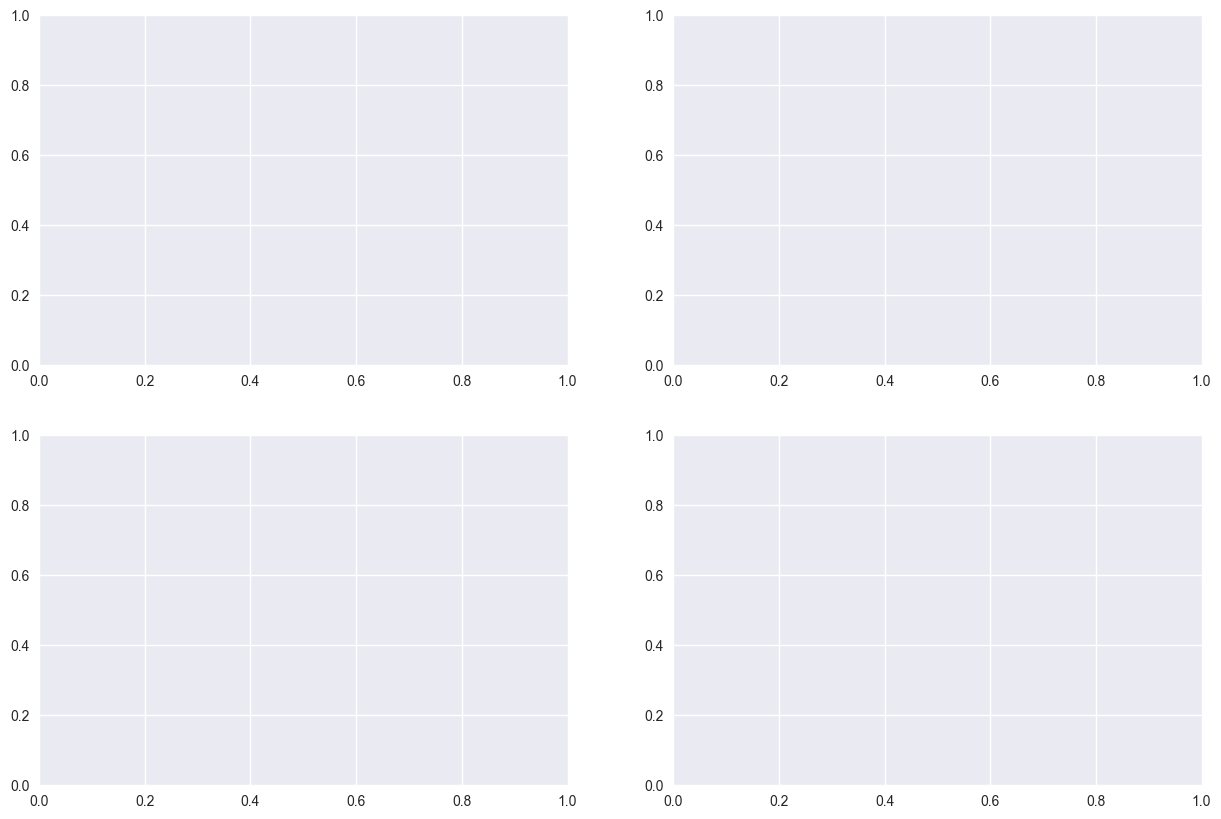

In [ ]:
# Visualise model performance:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy comparison:
axes[0, 0].bar(results_df.index, results_df['CV Score'], color='skyblue')
axes[0, 0].set_title('Model Accuracy (CV) Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylim(0.8, 1.0)

# F1-Score comparison:
axes[0, 1].bar(results_df.index, results_df['F1-Score'], color='lightgreen')
axes[0, 1].set_title('F1-Score Comparison')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylim(0.8, 1.0)

# Loop through models :
for model_name, model in models.items():
    
    # Get probability predictions:
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_selected)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test_selected)
    else:
        continue
    
    # Calculate ROC curve:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    # Plot:
    axes[1, 0].plot(fpr, tpr, label=f'{model_name} (AUC = {results[model_name]['ROC-AUC']:.3f})')

axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curves Comparison')
axes[1, 0].legend(loc='lower right')
axes[1, 0].set_xlim([0.0, 1.0])
axes[1, 0].set_ylim([0.0, 1.05])

# Overall metrics heatmap:
metrics_heatmap = results_df[['CV Score', 'Precision', 'Recall', 'F1-Score']]
sns.heatmap(metrics_heatmap, annot=True, cmap='Blues', fmt='.3f', ax=axes[1, 1])
axes[1, 1].set_title('Performance Metrics Heatmap')

plt.tight_layout()
plt.show()

# Find the best model:
best_model_name = results_df['CV Score'].idxmax()
print(f"\nBest performing model: {best_model_name}")
print(f"Accuracy: {results_df.loc[best_model_name, 'Accuracy']:.3f}")

3. Understanding the ROC curve

In [ ]:
# Predictions from the Random Forest model 


In [ ]:
# Probabilities for class 1 with Random Forest


In [ ]:
# The prediction threshold is at 0.5

In [ ]:
# But we can change that

thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

for thresh in thresholds:

    # Get the classification given the threshold
    y_pred_thresh = (y_proba >= thresh).astype(int)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred_thresh)
    tn, fp, fn, tp = cm.ravel()

    # Calculate TPR and FPR 
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    print(f"\nThreshold = {thresh}:")
    print(f"  True Positive Rate: {tpr:.3f}")
    print(f"  False Positive Rate: {fpr:.3f}")

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

## 4. Hyperparameter Tuning - Refining your best model

In [ ]:
# Hyperparameter tuning for the best model:
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    best_model = RandomForestClassifier(random_state=42)
elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 1],
        'kernel': ['rbf', 'linear']
    }
    best_model = SVC(random_state=42, probability=True)
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
    best_model = LogisticRegression(random_state=42)
else:
    print('No model selected')

Best parameters for Logistic Regression:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.947

Final optimised model accuracy: 0.965

Detailed Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.98      0.95        42
   Malignant       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [ ]:
# Grid search:
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

print(f"Best parameters for {best_model_name}:")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

In [ ]:
# Final evaluation:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test_selected)
final_accuracy = accuracy_score(y_test, final_predictions)

print(f"\nFinal optimised model accuracy: {final_accuracy:.3f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, final_predictions, target_names=['Benign', 'Malignant']))

# 5. Models explained

This table summarises the models we built here.


| **Model** | **How it Works** | **Pros** | **Cons** | **Why it performed as shown** |
|-----------|------------------|----------|----------|-------------------------------|
| **Logistic Regression** | Fits a linear equation to the features and applies a **sigmoid** to predict probability of malignancy vs benign. Learns coefficients that describe how each feature affects log-odds of outcome. | - Very fast and interpretable<br>- Produces probabilities<br>- Works well on linearly separable problems | - Only linear boundaries<br>- Sensitive to multicollinearity<br>- Limited with complex feature interactions | Breast cancer features (like radius, texture, concavity) are **reasonably linearly separable**, so logistic regression already achieves **high accuracy and ROC-AUC**. Its simplicity means little overfitting, hence stable performance. |
| **Random Forest** | An **ensemble of decision trees** trained on bootstrapped subsets of the data and features. Prediction = majority vote (classification). | - Handles non-linearities<br>- Robust to noise/outliers<br>- Works well without scaling<br>- Provides feature importance | - Can be slower on very large datasets<br>- Less interpretable<br>- May overfit if trees are deep | Performs similarly to logistic regression here because the dataset is relatively low-dimensional (30 features) and well-structured. Gains from capturing non-linearities are modest because many features are individually strong predictors. |
| **Support Vector Machine (SVM)** | Finds a **hyperplane** that maximises the margin between classes. With kernels, can model non-linear decision boundaries. | - Effective in high-dimensional spaces<br>- Works well with clear margin separation<br>- Flexible with kernels | - Sensitive to parameter choice<br>- Can be slower on larger datasets<br>- Harder to interpret | Slightly lower scores than logistic regression and RF — probably because the data already separates well linearly, so the SVM’s extra complexity does not add much benefit and may even slightly reduce generalisation. |
| **K-Nearest Neighbours (KNN)** | Classifies a new point by looking at the **majority class of its k nearest neighbours** in feature space. | - Simple, intuitive<br>- No training phase<br>- Captures local structure | - Slow at prediction on larger datasets<br>- Sensitive to scaling and irrelevant features<br>- Struggles in high dimensions | Works well here because malignant and benign tumours cluster separately in feature space. However, noise and overlapping regions reduce its stability compared to LR and RF. |
| **Gradient Boosting** | Builds an **ensemble of weak learners (shallow trees)** sequentially, where each tree corrects errors of the previous. | - High accuracy<br>- Captures complex patterns<br>- Robust with tuning | - Computationally intensive<br>- Sensitive to hyperparameters<br>- Can overfit small datasets | Slightly lower in your chart because the dataset is not very complex — boosting adds unnecessary complexity and may overfit noise. With tuning, performance could rise, but here simplicity wins. |